## 07-Broadcast
### Broadcast/Map Side Joins
> Sometimes, we might face a scenario in which we need to join a very big table (1 Billon+ rows) with a very small table (100 to 200 rows). The scenario might also involve increasing the size of your database like in the example below.

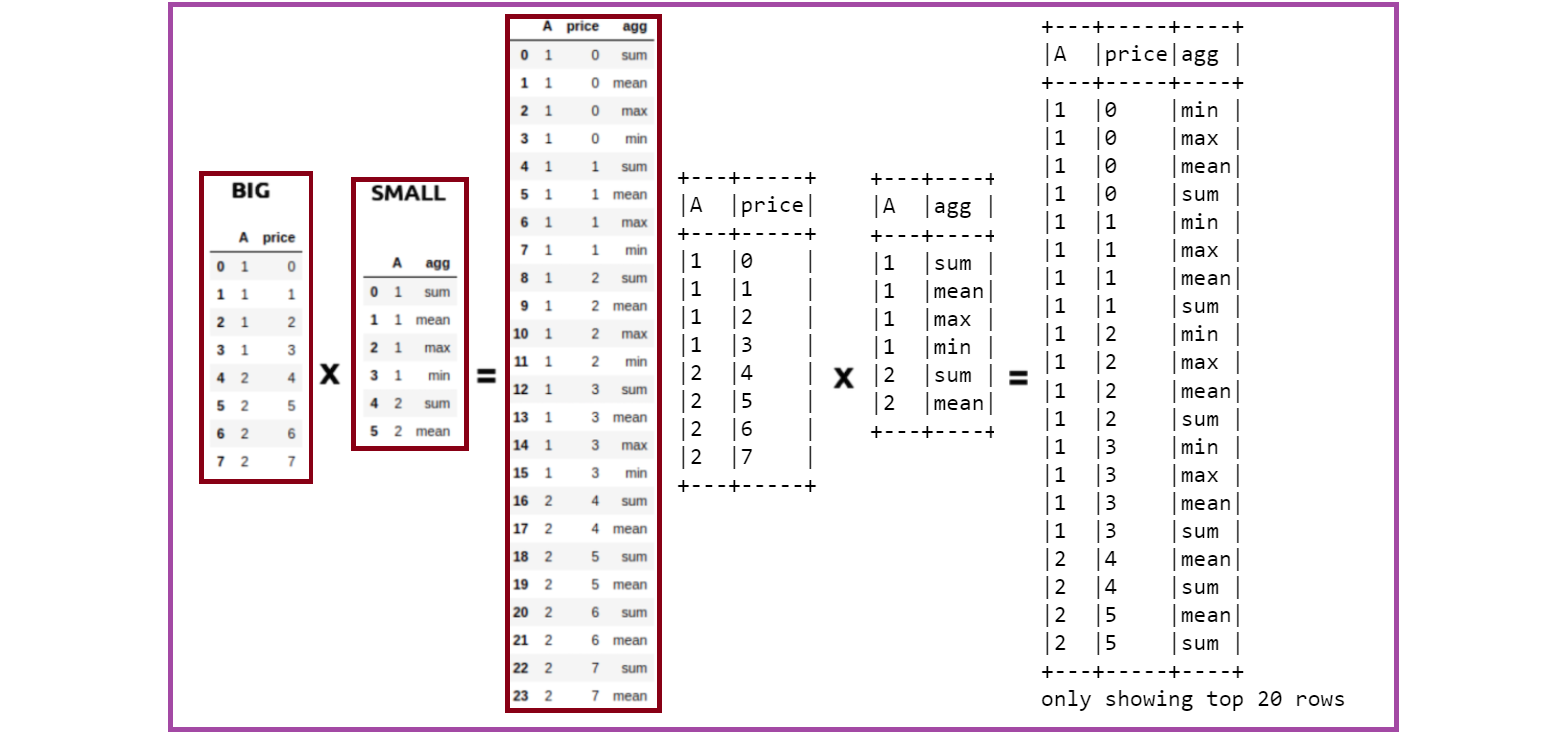

> Such operations are aplenty in Spark where we might want to apply multiple operations to a particular key. But assuming that the data for each key in the big table is large, it will involve a lot of data movement, sometimes so much that the application itself breaks. A small optimization that we can do when joining such big tables (assuming the other table is small) is to broadcast the small table to each machine/node when performing a join. We can do this easily using the broadcast keyword. This has been a lifesaver many times with Spark when everything else fails.

In [0]:
# 07-Broadcast
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
spark = SparkSession.builder.appName('PySparkExamples').getOrCreate()

In [0]:
data1 = [(1, 0), (1, 1), (1, 2), (1, 3), (2, 4), (2, 5), (2, 6), (2, 7)]
columns1 = ["A", "price"]
df1 = spark.createDataFrame(data = data1, schema = columns1)
print("DataFrame columns are:", df1.columns, "with column count:", len(df1.columns), "and with row count:", df1.count())
df1.printSchema()
df1.show(truncate = False)

DataFrame columns are: ['A', 'price'] with column count: 2 and with row count: 8
root
 |-- A: long (nullable = true)
 |-- price: long (nullable = true)

+---+-----+
|A  |price|
+---+-----+
|1  |0    |
|1  |1    |
|1  |2    |
|1  |3    |
|2  |4    |
|2  |5    |
|2  |6    |
|2  |7    |
+---+-----+



In [0]:
data2 = [(1, "sum"), (1, "mean"), (1, "max"), (1, "min"), (2, "sum"), (2, "mean")]
columns2 = ["A", "agg"]
df2 = spark.createDataFrame(data = data2, schema = columns2)
print("DataFrame columns are:", df2.columns, "with column count:", len(df2.columns), "and with row count:", df2.count())
df2.printSchema()
df2.show(truncate = False)

DataFrame columns are: ['A', 'agg'] with column count: 2 and with row count: 6
root
 |-- A: long (nullable = true)
 |-- agg: string (nullable = true)

+---+----+
|A  |agg |
+---+----+
|1  |sum |
|1  |mean|
|1  |max |
|1  |min |
|2  |sum |
|2  |mean|
+---+----+



In [0]:
from pyspark.sql.functions import broadcast
result = df1.join(broadcast(df2), ["A"], how='left')
print("DataFrame columns are:", result.columns, "with column count:", len(result.columns), "and with row count:", result.count())
result.show(truncate = False)

DataFrame columns are: ['A', 'price', 'agg'] with column count: 3 and with row count: 24
+---+-----+----+
|A  |price|agg |
+---+-----+----+
|1  |0    |min |
|1  |0    |max |
|1  |0    |mean|
|1  |0    |sum |
|1  |1    |min |
|1  |1    |max |
|1  |1    |mean|
|1  |1    |sum |
|1  |2    |min |
|1  |2    |max |
|1  |2    |mean|
|1  |2    |sum |
|1  |3    |min |
|1  |3    |max |
|1  |3    |mean|
|1  |3    |sum |
|2  |4    |mean|
|2  |4    |sum |
|2  |5    |mean|
|2  |5    |sum |
+---+-----+----+
only showing top 20 rows

